# <center><u> Exploratory Data Analysis</u> </center>

# `Problem Statement:`
We have used Cars dataset from kaggle  with features including make, model, year, engine, and other properties of the car used to predict its price.

### `TO  DOWNLOAD DATASET USED IN VIDEOS`: https://drive.google.com/drive/folders/15UNxHTINnphfk43m36ujfw6epMG-pDWp?usp=sharing



## 1. Importing the necessary libraries












In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## 2. Download the dataset and load into dataframe

<p style='text-align: right;'> 5 points</p>





Please download the dataset from [here](https://www.kaggle.com/CooperUnion/cardataset) and extract the csv file. Load the csv file as pandas dataframe. 

In [2]:
## load the csv file 
df = pd.read_csv('/content/cars.csv')

Now we observe the each features present in the dataset.<br>

 `Make:` The Make feature is the company name of the Car.<br>
`Model:` The Model feature is the model or different version of Car models.<br>
`Year:`  The year describes the model has been launched.<br>
`Engine Fuel Type:` It defines the Fuel type of the car model.<br>
`Engine HP:` It's say the Horsepower that refers to the power an engine produces.<br>
`Engine Cylinders:` It define the nos of cylinders in present in the engine.<br>
`Transmission Type:` It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>
`Driven_Wheels:` The type of wheel drive.<br>
`No of doors:` It defined nos of doors present in the car.<br>
`Market Category:` This features tells about the type of car or which category the car belongs. <br>
`Vehicle Size:` It's say about the about car size.<br>
`Vehicle Style:` The feature is all about the style that belongs to car.<br>
`highway MPG:` The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.<br>
`city mpg:` City MPG refers to driving with occasional stopping and braking.<br>
`Popularity:` It can refered to rating of that car or popularity of car.<br>
`MSRP:` The price of that car.







In [3]:
## print the head of the dataframe
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 3. Check the datatypes

<p style='text-align: right;'> 2 points</p>


In [4]:
# Get the datatypes of each columns number of records in each column.
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 4. Dropping irrevalent columns

## **`WATCH VIDEOS IN THE PORTAL`**
### **`Video 1: Deleting rows and columns from the Dataframe`**

If we consider all columns present in the dataset then unneccessary columns will impact on the model's accuracy.<br>
Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us. It would reflect our model's accucary so we need to drop them. Otherwise it will affect our model.


The list cols_to_drop contains the names of the cols that are irrevalent, drop all these cols from the dataframe.


`cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]`

These features are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset. 

In [5]:
# initialise cols_to_drop
cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]
cols_to_drop

['Engine Fuel Type',
 'Market Category',
 'Vehicle Style',
 'Popularity',
 'Number of Doors',
 'Vehicle Size']

In [6]:
# drop the irrevalent cols and print the head of the dataframe
df = df.drop(cols_to_drop,axis=1)

# print df head
df.head()


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 5.  Renaming the columns

<p style='text-align: right;'> 5 points</p>


Now, Its time for renaming the feature to useful feature name. It will help to use them in model training purpose.<br>

We have already dropped the unneccesary columns, and now we are left with useful columns. One extra thing that we would do is to rename the columns such that the name clearly represents the essence of the column.

The given dict represents (in key value pair) the previous name, and the new name for the dataframe columns

In [7]:
# rename cols 
rename_cols = {'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Driven_Mode','highway MPG':'MPG_H','city mpg':'MPG_C','MSRP':'Price'}


In [8]:
# use a pandas function to rename the current columns - 
df = df.rename(columns=rename_cols)


In [9]:
# Print the head of the dataframe
df.head()


,Make,Model,Year,HP,Cylinders,Transmission,Driven_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 6. Dropping the duplicate rows

### **`Video 2: Duplicate Values`**

There are many rows in the dataframe which are duplicate, and hence they are just repeating the information. Its better if we remove these rows as they don't add any value to the dataframe. 

For given data, we would like to see how many rows were duplicates. For this, we will count the number of rows, remove the dublicated rows, and again count the number of rows.

`Documentation Link`: Must go through this - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [10]:
# number of rows before removing duplicated rows
df.count()


Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Driven_Mode     11914
MPG_H           11914
MPG_C           11914
Price           11914
dtype: int64

In [11]:
# drop the duplicated rows
df = df.drop_duplicates()

# print head of df
df.head()


,Make,Model,Year,HP,Cylinders,Transmission,Driven_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [12]:
# Count Number of rows after deleting duplicated rows
df.count()


Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Driven_Mode     10925
MPG_H           10925
MPG_C           10925
Price           10925
dtype: int64

## 7. Dropping the null or missing values 



<p style='text-align: right;'> 10 points</p>


Missing values are usually represented in the form of Nan or null or None in the dataset.

Finding whether we have null values in the data is by using the isnull() function.

There are many values which are missing, in pandas dataframe these values are reffered to as np.nan. We want to deal with these values beause we can't use nan values to train models. Either we can remove them to apply some strategy to replace them with other values.

To keep things simple we will be dropping nan values

### **`Video 3: Missing Value Handling`**

`Documentation Link`: Must go through this - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [16]:
# check for nan values in each columns
df.isnull().sum()


Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Driven_Mode      0
MPG_H            0
MPG_C            0
Price            0
dtype: int64

As we can see that the HP and Cylinders have null values of 69 and 30. As these null values will impact on models' accuracy. So to avoid the impact we will drop the these values. As these values are small camparing with dataset  that will not impact any major affect on model accuracy so we will drop the values.

In [17]:
# drop missing values
df = df.dropna()
  

In [18]:
# Make sure that missing values are removed
# check number of nan values in each col again
df.isnull().sum()


Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Driven_Mode     0
MPG_H           0
MPG_C           0
Price           0
dtype: int64

In [19]:
#Describe statistics of df
df.describe()


,Year,HP,Cylinders,MPG_H,MPG_C,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


## 8. Removing outliers

### **`Video 4: Removing Outliers from the DataFrame`**

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

### Detecting outliers

There many techiniques to detect outliers. Let us first see the simplest form of visualizing outliers.

Box plots are a graphical depiction of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers, can be considered outliers or anomalous.

`Documentation Link`: Must go through this - https://seaborn.pydata.org/generated/seaborn.boxplot.html

<p style='text-align: right;'> 15 points</p>


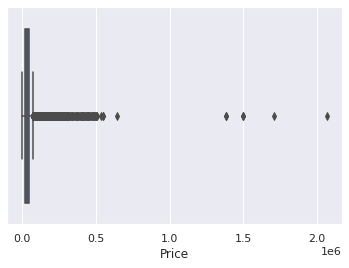

In [20]:
## Plot a boxplot for 'Price' column in dataset. 
sns.boxplot(x=df["Price"])


### **`Observation:`**<br>

Here as you see that we got some values near to 1.5 and 2.0 . So these values are called outliers. Because there are away from the normal values.
Now we have detect the outliers of the feature of Price. Similarly we will checking of anothers features.

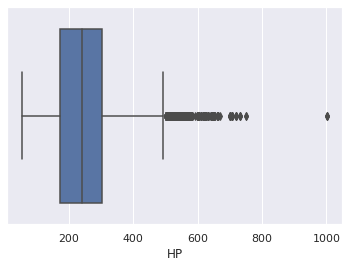

In [21]:
## PLot a boxplot for 'HP' columns in dataset
sns.boxplot(x=df["HP"])



### **`Observation:`**<br>
Here boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of HP.

print all the columns which are of int or float datatype in df. 

Hint: Use loc with condition

In [22]:
# print all the columns which are of int or float datatype in df.
df.loc[:,df.dtypes !=object]


,Year,HP,Cylinders,MPG_H,MPG_C,Price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


### `Save the column names of the above output in variable list named 'l'`


In [25]:
# save column names of the above output in variable list
l= list(df.loc[:,df.dtypes != object].columns)
l

['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG_C', 'Price']

## **`Outliers removal techniques`**

1. **Using IQR Technique**
 

### **`Video 5: IQR Outlier And Z score`**

**Here comes cool Fact for you!**

IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

The anatomy of boxplot is given below.

![image.png](attachment:image.png)

- Calculate IQR  and give a suitable threshold to remove the outliers and save this new dataframe into df2.

Let us help you to decide threshold: Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or above (Q3 + 1.5x IQR)

In [31]:
## define Q1 and Q2
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# define IQR (interquantile range) 
IQR =  Q3-Q1  

# define df2 after removing outliers
df2 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

2. **Outlier removal using Z-score function**

  - The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.

We will use Z-score function defined in scipy library to detect the outliers in dataframe df having columns which are in variable 'l'


In [35]:
# use stats.zscore on list l from above code and take abs value
z = np.abs(stats.zscore(df[l]))

# print z
print(z)


           Year        HP  Cylinders     MPG_H     MPG_C     Price
0      0.014743  0.732425   0.174386  0.041059  0.049314  0.058463
1      0.014743  0.413769   0.174386  0.225455  0.049314  0.029591
2      0.014743  0.413769   0.174386  0.225455  0.101214  0.098621
3      0.014743  0.223542   0.174386  0.225455  0.199843  0.209390
4      0.014743  0.223542   0.174386  0.225455  0.199843  0.128320
...         ...       ...        ...       ...       ...       ...
11909  0.157006  0.413769   0.174386  0.440829  0.500900  0.058222
11910  0.157006  0.413769   0.174386  0.440829  0.500900  0.227587
11911  0.157006  0.413769   0.174386  0.440829  0.500900  0.130463
11912  0.299270  0.413769   0.174386  0.440829  0.500900  0.135279
11913  0.696575  0.305482   0.174386  0.041059  0.350371  0.216695

[10827 rows x 6 columns]


Hey buddy! do you understand the above output? Difficult right? let’s try and define a threshold to identify an outlier so that we get a clear picture of whats going on.

We will not spare you without a good fact! ;)

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [36]:
# print the values in dataframe which are less than the threshold and save this dataframe as df3
threshold1 = 3 
threshold2 = -3
df3 = df[((z<threshold1) | (z>threshold2)).all(axis=1)]

# print df3
df3.head()


,Make,Model,Year,HP,Cylinders,Transmission,Driven_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


print the shape difference of df df2 and df3. 

In [41]:
# print the shape difference of df df2 and df3.
print(df.shape)
print(df2.shape)
print(df3.shape)


(10827, 10)
(9191, 10)
(10827, 10)


Interesting right? Bam! you have removed 489 rows from the dataframe which was detected as outlier by Z-score technique.
and removed 1636 rows from the dataframe which was detected as outlier by IQR technique.

By the way there are many other techniques by which you can remove outliers. You can explore on more interesting techniques
available.

We know you must be having many questions in you mind like:
- Which technique we should use and why?
- Is it neccessary that whatever detected as outlier are really outliers?

Dont't worry these delimma is faced my many data analyst. We provide you with good references below for you to explore further on this

- https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
- https://www.researchgate.net/post/Which-is-the-best-method-for-removing-outliers-in-a-data-set

Lets find unique values and there counts in each column in df using value counts function.

Value counts reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

In [43]:
# find unique values and there counts in each column in df using value counts function.
for i in df.columns:
    print ("--------------- %s ----------------" % i)
    print(df[i].value_counts())

--------------- Make ----------------
Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo      

## Visualising Univariate Distributions

We will use seaborn library to visualize eye catchy univariate plots. 

Do you know? you have just now already explored one univariate plot. guess which one? Yeah its box plot.


### **`Video 6: Data Visualisation by Different Plots`**

### **`Video 7: Matplotlib (creating visual, labels,subplot)`**

### **`Video 8: Matplotib part 2(Object Oriented way, fonts, fig_size,dpi)`**

### **`Video 9: Matplotlib part 3(Legends,labels)`**

### **`Video 10: Matplotlib part 4(barchart, scatter plot chart,histogram,piechart)`**

### **`Video 11 & 12: Seaborn tutorial`**

### 1 . Histogram & Density Plots

<p style='text-align: right;'> 15 points</p>

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

`Documentation Link`: Must go through this - https://seaborn.pydata.org/generated/seaborn.displot.html

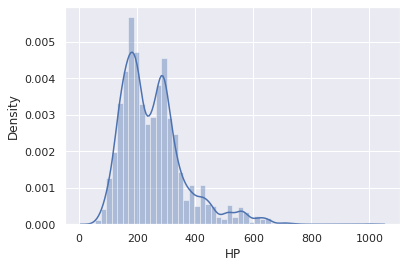

In [45]:
#ploting distplot for variable HP
sns.distplot(df["HP"])


### **`Observation:`**
We plot the Histogram of feature HP with help of distplot in seaborn.<br> 
In this graph we can see that there is max values near at 200. similary we have also the 2nd highest value near 400 and so on. <br>
It represents the overall distribution of continuous data variables.<br>

Since seaborn uses matplotlib behind the scenes, the usual matplotlib functions work well with seaborn. For example, you can use subplots to plot multiple univariate distributions.
- Hint: use matplotlib subplot function

`CHECK THIS FOR SUBPLOT`: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

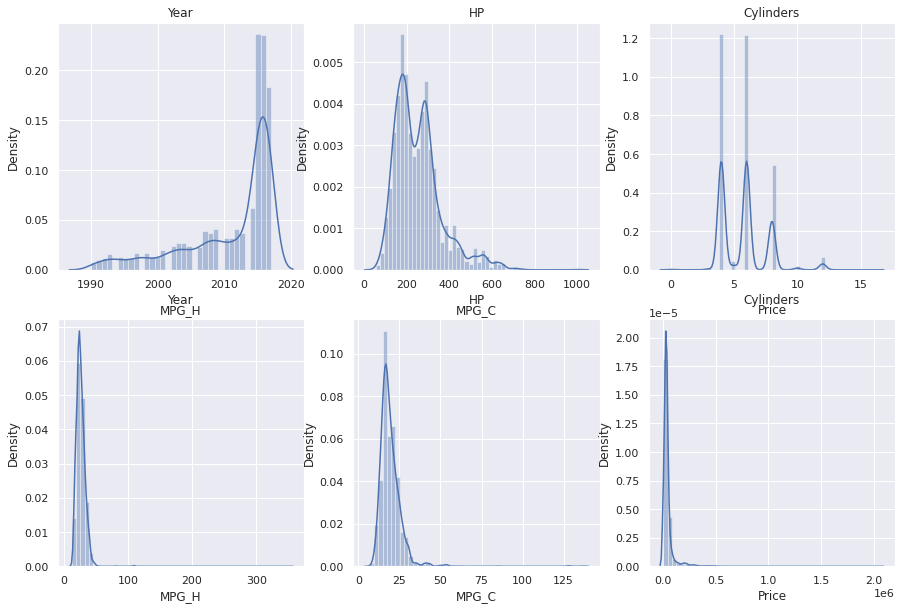

In [46]:
# plot all the columns present in list l together using subplot of dimention (2,3).
c=0
plt.figure(figsize=(15,10))
for i in l:
    c=c+1
    plt.subplot(2,3,c)
    plt.title(i)
    sns.distplot(df[i])
plt.show()


## 2. Bar plots

<p style='text-align: right;'> 10 points</p>


Plot a histogram depicting the make in X axis and number of cars in y axis. <br>

`BAR PLOT LINK USING KIND PARAMETER`: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

Text(0.5, 0, 'Make')

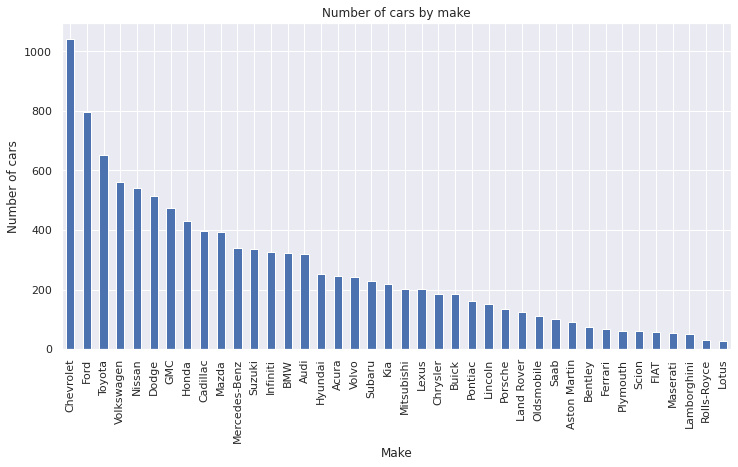

In [48]:
plt.figure(figsize = (12,8))

# use nlargest and then .plot to get bar plot like below output

df.Make.value_counts().nlargest(40).plot(kind="bar",figsize=(12,6))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

### **`Observation:`**
In this plot we can see that we have plot the bar plot with the cars model and nos. of cars.

### 3. Count Plot

<p style='text-align: right;'> 10 points</p>

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.


 Plot a countplot for a variable Transmission vertically with hue as Drive mode

`COUNTPLOT LINK`: https://seaborn.pydata.org/generated/seaborn.countplot.html

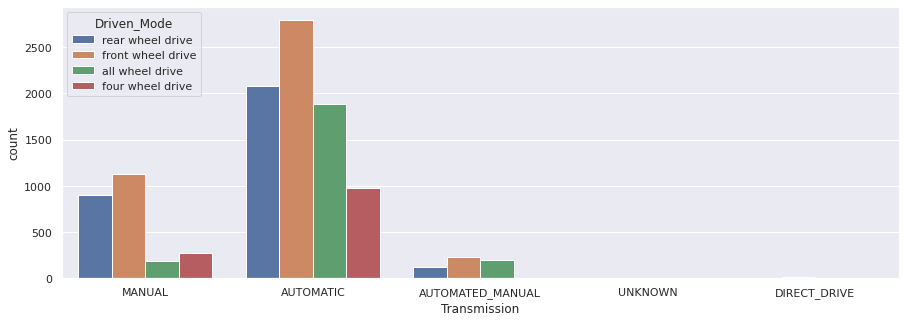

In [57]:
plt.figure(figsize=(15,5))

# plot countplot on transmission and drive mode
sns.countplot(data=df,x="Transmission",hue="Driven_Mode")


# 'Cylinders', y='Price'

### **`Observation:`**
In this count plot, We have plot the feature of Transmission with help of hue.<br>
We can see that the the nos of count and the transmission type and automated manual is plotted. Drive mode as been given with help of hue.<br>


# Visualising Bivariate Distributions


Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.




## 1. Scatterplots
Scatterplots are used to find the correlation between two continuos variables. <br>
<p style='text-align: right;'> 10 points</p>

Using scatterplot find the correlation between 'HP' and 'Price' column of the data. 



`CHECK THIS SCATTERPLOT METHOD ON STACKOVERFLOW`: https://stackoverflow.com/questions/57435771/scatter-plot-with-subplot-in-seaborn

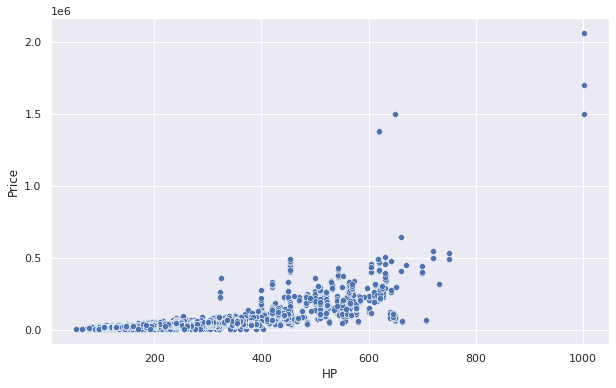

In [58]:
## Your code here - 
fig, ax = plt.subplots(figsize=(10,6))

# plot scatterplot on hp and price
sns.scatterplot(data=df,x="HP",y="Price")



### **`Observation:`**<br>
It is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.<br>
We have plot the scatter plot with x axis as HP and y axis as Price.<br>
The data points between the features should be same either wise it give errors.<br>


## 4. joint distributions


Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid


`CHECK TYPE OF JOINTPLOT`: https://seaborn.pydata.org/generated/seaborn.jointplot.html

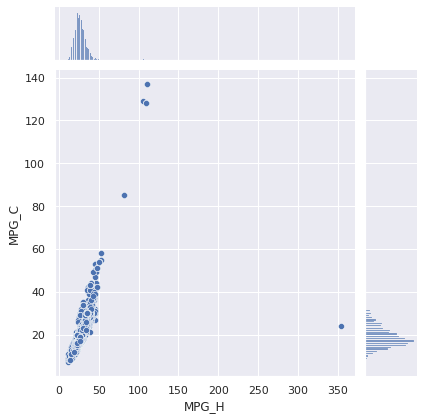

In [59]:
# joint plots of MPG_H and MPG-C
sns.jointplot(data=df,x="MPG_H",y="MPG_C")



### **`Observations:`**<br>
Jointplot is  library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.<br>
In this plot we can see the relationship of MPG-C abd MPG_H.

You can adjust the arguments of the jointplot() to make the plot more readable. 

## 5. Plotting Aggregated Values across Categories


### Bar Plots - Mean, Median and Count Plots

<p style='text-align: right;'> 30 points</p>



Bar plots are used to **display aggregated values** of a variable, rather than entire distributions. This is especially useful when you have a lot of data which is difficult to visualise in a single figure. 

For example, say you want to visualise and *compare the Price across Cylinders*. The ```sns.barplot()``` function can be used to do that.


`BARPLOT USING SEABORN`: https://seaborn.pydata.org/generated/seaborn.barplot.html

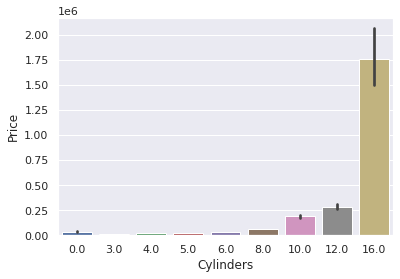

In [61]:
# bar plot with default statistic=mean between Cylinder and Price
sns.barplot(data=df,x='Cylinders',y="Price")





### **`Observation:`**<br>
By default, seaborn plots the mean value across categories, though you can plot the count, median, sum etc.<br>
Also, barplot computes and shows the confidence interval of the mean as well.



### `When you want to visualise having a large number of categories, it is helpful to plot the categories across the y-axis. Let's now *drill down into Transmission sub categories*.` 

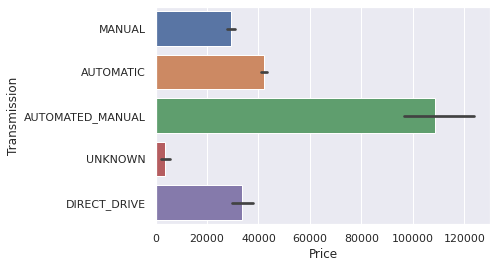

In [64]:
# Plotting categorical variable Transmission across the y-axis
sns.barplot(data=df,x="Price",y="Transmission")



Plot bar plot for Price and Transmission with hue="Drive Mode"


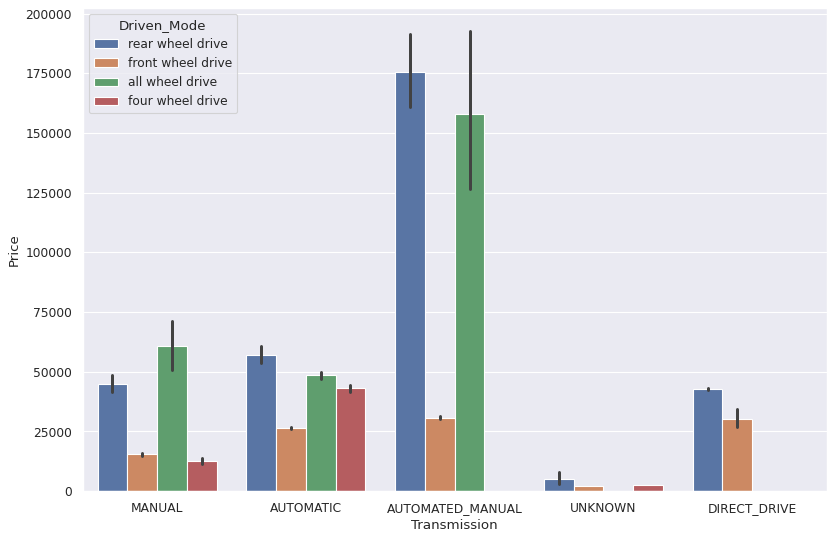

In [65]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# Plot bar plot for Price and Transmission , specify hue="Drive Mode"
sns.barplot(data=df, x="Transmission",y="Price", hue="Driven_Mode")


These plots looks beutiful isn't it? In Data Analyst life such charts are there unavoidable friend.:)

# Multivariate Plots



# 1. Pairplot

<p style='text-align: right;'> 10 points</p>

Plot a pairplot for the dataframe df. 



`SEABORN PAIRPLOT`: https://seaborn.pydata.org/generated/seaborn.pairplot.html

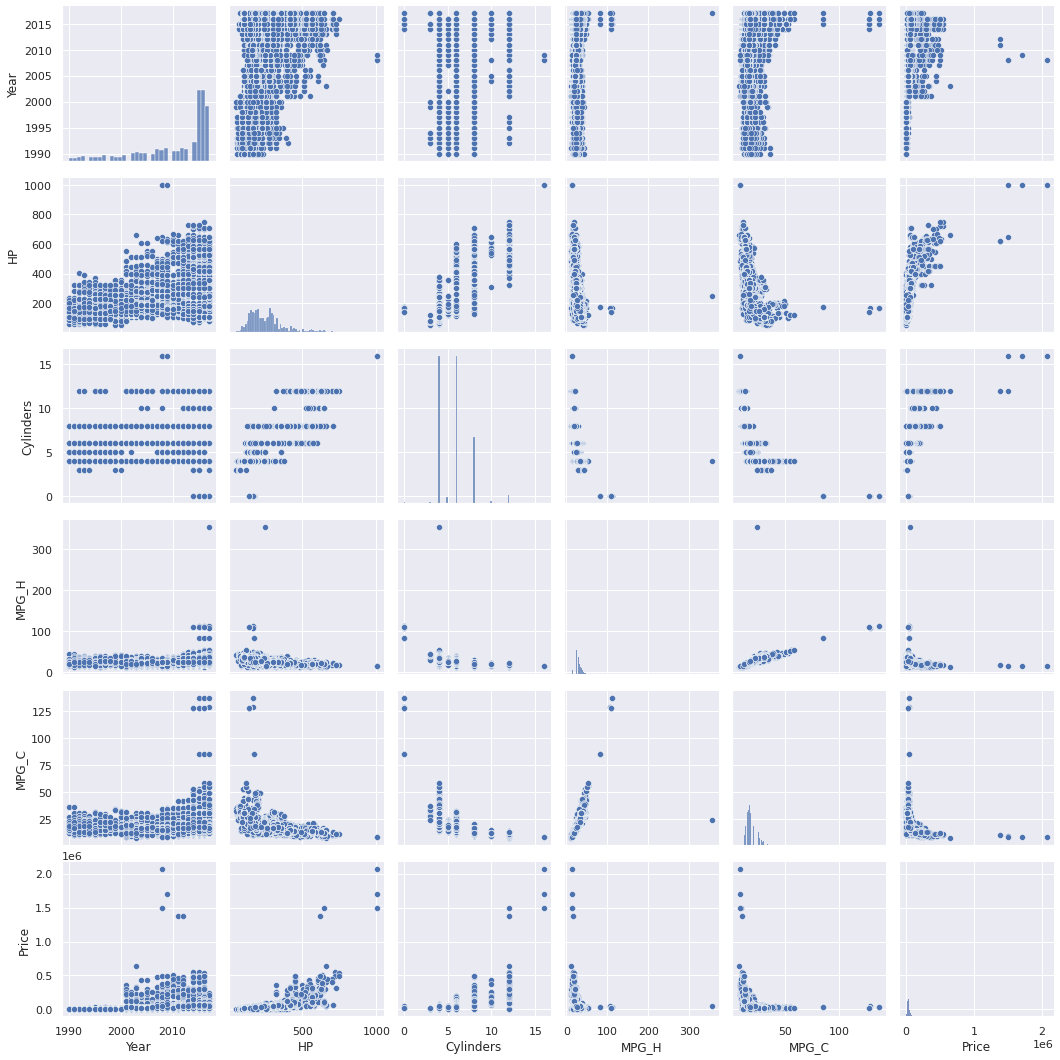

In [66]:
# plot pairplot on df
sns.pairplot(df)


### **`Observation:`**<br>
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

## 2.  Heatmaps


A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

<p style='text-align: right;'> 20 points</p>
Using heatmaps plot the correlation between the features present in the dataset.

`SEABORN HEATMAP`: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [68]:
#find the correlation of features of the data 
corr = df.corr()

# print corr
print(corr)

               Year        HP  Cylinders     MPG_H     MPG_C     Price
Year       1.000000  0.314971  -0.050598  0.284237  0.234135  0.196789
HP         0.314971  1.000000   0.788007 -0.420281 -0.473551  0.659835
Cylinders -0.050598  0.788007   1.000000 -0.611576 -0.632407  0.554740
MPG_H      0.284237 -0.420281  -0.611576  1.000000  0.841229 -0.209150
MPG_C      0.234135 -0.473551  -0.632407  0.841229  1.000000 -0.234050
Price      0.196789  0.659835   0.554740 -0.209150 -0.234050  1.000000


<Figure size 864x576 with 0 Axes>

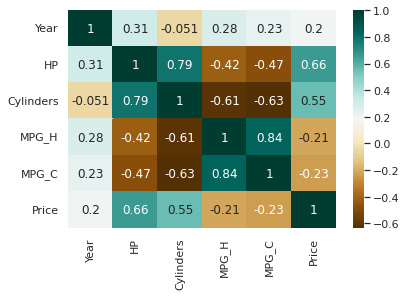

<Figure size 864x576 with 0 Axes>

In [69]:
# Using the correlated df, plot the heatmap 
# set cmap = 'BrBG', annot = True - to get the same graph as shown below 
# set size of graph = (12,8)
sns.heatmap(data=corr,cmap='BrBG',annot=True)
plt.figure(figsize=(12,8))


### **`Observation:`**<br>
A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.


The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1. 


Amazing work done ! you have really made eye catchy visualization plots so far.
Did you felt its complicate to understand the above plot?. Hey smarty don't worry, in near assignments you will have enough practise to analyse and prepare insights from such plots that you will become pro in this field. 

Then soon you will be like below meme
![image.png](attachment:image.png)

---------------------------------

# Have a sweet cookie:) Congratulations! you have completed the 6th milestone challenge too. 

--------------------------------

# FeedBack
We hope you’ve enjoyed this course so far. We’re committed to helping you use AIforAll course to its full potential so you can grow with us. And that’s why we need your help in form of a feedback here

We appreciate your time for your thoughtful comment.

https://forms.gle/SedkKUD2TNPCnafj8

